In [1]:
%load_ext autoreload
%autoreload 2

# Fixing forward sampling

In [2]:
import pandas as pd

X = pd.DataFrame(
    [
        [True, True, True],
        [False, False, False]
    ],
    columns=['A', 'B', 'C']
)

X

,A,B,C
0,True,True,True
1,False,False,False


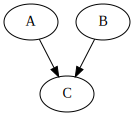

In [94]:
import hedgehog as hh

bn = hh.BayesNet(
    (['A', 'B'], 'C')
)
bn.fit(X)

bn

In [111]:
next(bn._flood_fill_sampling())

{'A': True, 'C': True, 'B': True}

In [69]:
None or 1

/Users/max.halford/projects/hedgehog/hedgehog/bayes_net.py:16: UserWarning: registration of accessor <class 'hedgehog.bayes_net.CDTAccessor'> under name 'cdt' for type <class 'pandas.core.series.Series'> is overriding a preexisting attribute with the same name.
  class CDTAccessor:


1

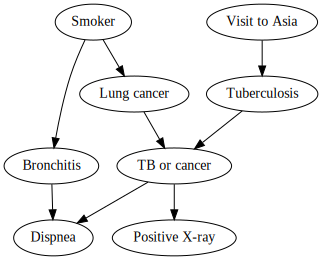

In [41]:
bn

In [15]:
PA = bn.P['A']
PA

A
False    0.5
True     0.5
Name: P(A), dtype: float64

In [18]:
PC = bn.P['C'].groupby(['A', 'C']).sum()
PC

A      C    
False  False    1.0
True   True     1.0
Name: P(C | A, B), dtype: float64

In [19]:
PB = bn.P['B']
PB

B
False    0.5
True     0.5
Name: P(B), dtype: float64

In [20]:
bn.markov_boundary('B')

['A', 'C']

In [27]:
from hedgehog.bayes_net import pointwise_mul

node = 'B'

PB = bn.P[node]

boundary = bn.markov_boundary(node)

for related in boundary:
    PB = pointwise_mul(PB, bn.P[related])
    
PB = PB.groupby(boundary).apply(lambda g: g / g.sum())
PB = PB.reorder_levels([*boundary, node])
PB

A      C      B    
False  False  False    1.0
True   True   True     1.0
dtype: float64

In [31]:
PB.cdt[(False, False)]

B
False    1.0
dtype: float64